# TASK 1 - Prediction using Supervised ML
To Predict the percentage of marks of the students based on the number of hours they studied

## Author - Ronak Patra

In [4]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [7]:
!pip install sklearn
import sklearn

You should consider upgrading via the 'c:\Users\DELL\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\dell\appdata\local\programs\python\python39\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-m2_6yhax\\sklearn_1adcf9949d8b4bc891e6d26250940fb2\\setup.py'"'"'; __file__='"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-m2_6yhax\\sklearn_1adcf9949d8b4bc891e6d26250940fb2\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\DELL\AppData\Local\Temp\pip-pip-egg-info-k7ischp5'
         cwd: C:\Users\DELL\AppData\Local\Temp\pip-install-m2_6yhax\sklearn_1adcf9949d8b4bc891e6d26250940fb2\
    Complete output (18 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rath

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(1)

,Hours,Scores
0,2.5,21


In [16]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
df.shape

(25, 2)

In [11]:
# Check if there any null value in the Dataset
df.isnull == True

False

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### As we have found no Null value, so now we can proceed with the Visualisation of our Data

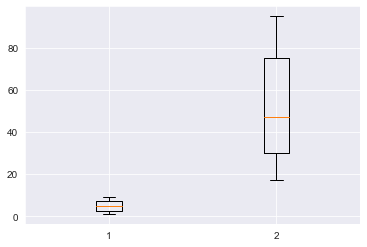

In [17]:
plt.boxplot(df)
plt.show()

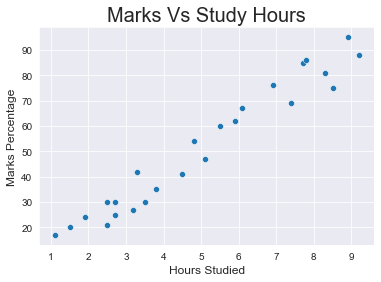

In [14]:
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

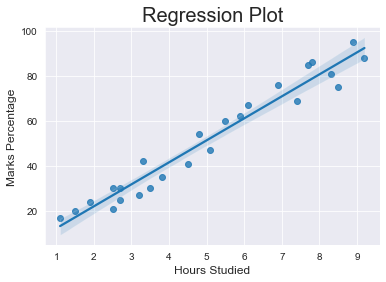

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [18]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

It is confirmed that the variables are positively correlated

## Training the Model

### 1) Splitting the Data

In [19]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [34]:
linreg=LinearRegression()
linreg.fit(train_X,train_y)
Y0 = linreg.intercept_ + linreg.coef_*train_X

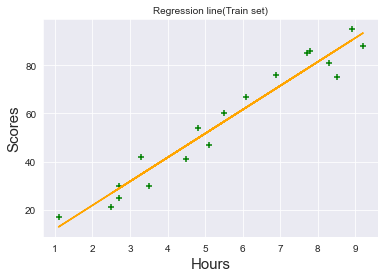

In [35]:
##plotting on train data
plt.scatter(train_X,train_y,color='green',marker='+')
plt.plot(train_X,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [20]:
### 2) Fitting the Data into the model

In [21]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("-----Model Trained-----")

-----Model Trained-----


## Predicting the Percentage of Marks

In [23]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [24]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing the Predicted Marks with the Actual Marks

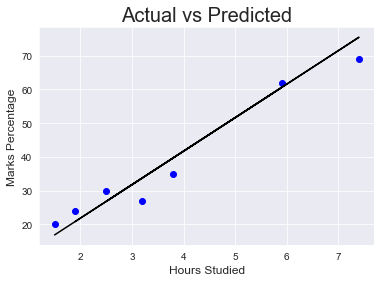

In [25]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluating the Model

In [26]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [27]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.